In [3]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline


from models.wimp import SIWIMP
from models.wimp import SIWIMP_Helm
from models.migdal import MIGDAL
from models.inelastic import SIInel
from detectors.dama import DAMA
from veldists import VelDist
from constants import *

In [12]:
## Step 1
Det = DAMA()
Model = MIGDAL()
Dist = VelDist("avSHM",0.3)

E = np.logspace(0,4, base= 10, num = 100)
mX = 1*GeV; sig = 1e-36; 

In [60]:
Minimal = [[Model.dRdER(target, e, mX, sig, Dist) for e in E] for target in Det.Nuclei()]
total = [Minimal[0][x]+Minimal[1][x] for x in range(len(E))]
detTrue = [Det.dRdE_True(e, Model.dRdER, mX=mX,sig=sig, VelDist=Dist, NR=False) for e in E]
Efficiency = np.array([Det.Eff(e) for e in E*1e-3])

import scipy 
Resolution = np.array([scipy.integrate.quad(lambda e2: Det.Res(e*1e-3, e2), 0, 60)[0] for e in E])


/Users/owenstanley/Documents/Research-Work/SensitivityStudies/sgm/models/migdal.py:56: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(lambda ER: self.dR2dEREE(Target,
/Users/owenstanley/Documents/Research-Work/SensitivityStudies/sgm/models/migdal.py:56: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(lambda ER: self.dR2dEREE(Target,
/Users/owenstanley/Documents/Research-Work/SensitivityStudies/sgm/models/migdal.py:56: In

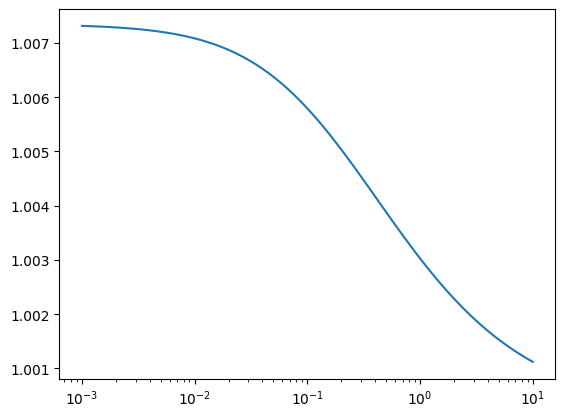

In [71]:
plt.plot(E*1e-3,Resolution)
plt.xscale('log')

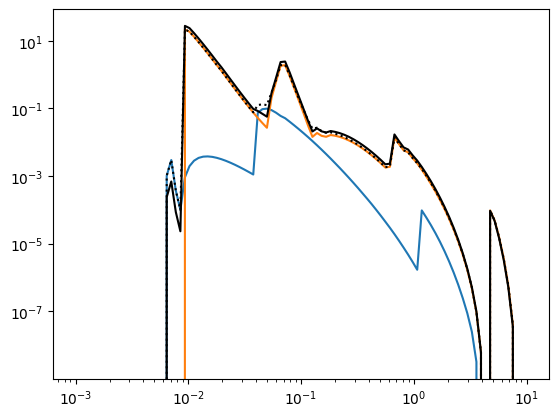

In [73]:
fig, ax = plt.subplots()
ax.plot(E*1e-3, Minimal[0]*Efficiency*Resolution)
ax.plot(E*1e-3, Minimal[1]*Efficiency*Resolution)
ax.plot(E*1e-3,total*Efficiency*Resolution, linewidth=1.5, linestyle='dotted', color = 'black')
ax.plot(E*1e-3,detTrue, linewidth=1.5, color = 'Black')

ax.set_xscale('log')
ax.set_yscale('log')